In [1]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.metrics import mean_absolute_error
import datetime as dt
%matplotlib inline

2022-06-09 16:22:00.388613: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-09 16:22:00.388636: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
crypto_currency = 'BTC'
against_currency = 'USD'

In [3]:
start=dt.datetime(2021,6,9)
end=dt.datetime.now()

In [4]:
hist=web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)

In [5]:
hist

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-08,34017.386719,31114.443359,33589.519531,33472.632812,49902050442,33472.632812
2021-06-09,37537.371094,32475.865234,33416.976562,37345.121094,53972919008,37345.121094
2021-06-10,38334.324219,35847.593750,37389.515625,36702.597656,43576032854,36702.597656
2021-06-11,37608.695312,36044.449219,36697.031250,37334.398438,38699736985,37334.398438
2021-06-12,37408.925781,34728.191406,37340.144531,35552.515625,37924228550,35552.515625
...,...,...,...,...,...,...
2022-06-05,30117.744141,29574.449219,29835.117188,29906.662109,17264085441,29906.662109
2022-06-06,31693.291016,29894.187500,29910.283203,31370.671875,31947336829,31370.671875
2022-06-07,31489.683594,29311.683594,31371.742188,31155.478516,40770974039,31155.478516


In [6]:
hist

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-08,34017.386719,31114.443359,33589.519531,33472.632812,49902050442,33472.632812
2021-06-09,37537.371094,32475.865234,33416.976562,37345.121094,53972919008,37345.121094
2021-06-10,38334.324219,35847.593750,37389.515625,36702.597656,43576032854,36702.597656
2021-06-11,37608.695312,36044.449219,36697.031250,37334.398438,38699736985,37334.398438
2021-06-12,37408.925781,34728.191406,37340.144531,35552.515625,37924228550,35552.515625
...,...,...,...,...,...,...
2022-06-05,30117.744141,29574.449219,29835.117188,29906.662109,17264085441,29906.662109
2022-06-06,31693.291016,29894.187500,29910.283203,31370.671875,31947336829,31370.671875
2022-06-07,31489.683594,29311.683594,31371.742188,31155.478516,40770974039,31155.478516


In [7]:
hist=hist.drop(["Open","High","Low","Adj Close","Volume"],axis=1)

In [8]:
hist

,Close
Date,
2021-06-08,33472.632812
2021-06-09,37345.121094
2021-06-10,36702.597656
2021-06-11,37334.398438
2021-06-12,35552.515625
...,...
2022-06-05,29906.662109
2022-06-06,31370.671875
2022-06-07,31155.478516


In [9]:
#plotting function
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [CAD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

In [10]:
test_size = 0.2

In [11]:
split_row = len(hist) - int(test_size * len(hist))
train = hist.iloc[:split_row]
test = hist.iloc[split_row:]

In [12]:
train,test

(                   Close
 Date                    
 2021-06-08  33472.632812
 2021-06-09  37345.121094
 2021-06-10  36702.597656
 2021-06-11  37334.398438
 2021-06-12  35552.515625
 ...                  ...
 2022-03-24  43960.933594
 2022-03-25  44348.730469
 2022-03-26  44500.828125
 2022-03-27  46820.492188
 2022-03-28  47128.003906
 
 [294 rows x 1 columns],
                    Close
 Date                    
 2022-03-29  47465.730469
 2022-03-30  47062.664062
 2022-03-31  45538.675781
 2022-04-01  46281.644531
 2022-04-02  45868.949219
 ...                  ...
 2022-06-05  29906.662109
 2022-06-06  31370.671875
 2022-06-07  31155.478516
 2022-06-08  30214.355469
 2022-06-09  30507.429688
 
 [73 rows x 1 columns])

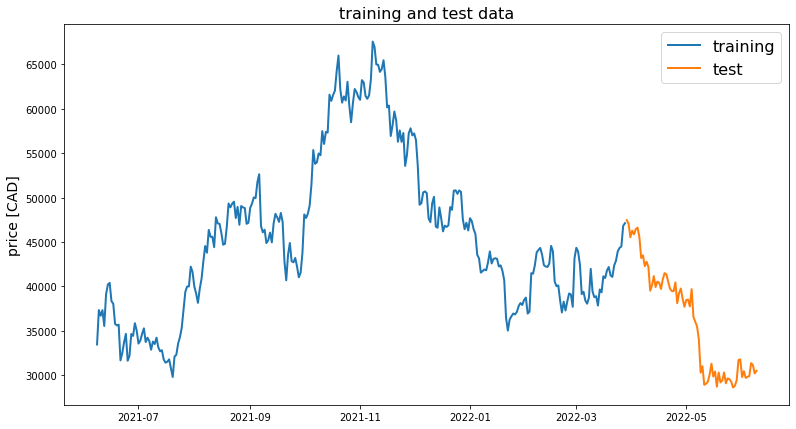

In [13]:
line_plot(train["Close"], test["Close"], 'training', 'test', title='training and test data')

In [14]:
#function to normalize data
def normalise_zero_base(df):
    return df / df.iloc[0] - 1

In [15]:
def extract_window_data(df, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [16]:
def prepare_data(df,window_len=10, zero_base=True, test_size=0.2):
    X_train = extract_window_data(train, window_len, zero_base)
    X_test = extract_window_data(test, window_len, zero_base)
    y_train = train["Close"][window_len:].values
    y_test = test["Close"][window_len:].values
    if zero_base:
        y_train = y_train / train["Close"][:-window_len].values - 1
        y_test = y_test / test["Close"][:-window_len].values - 1

    return X_train, X_test, y_train, y_test

In [17]:
window_len=5
zero_base=True

In [18]:
X_train,X_test,Y_train,Y_test = prepare_data(hist, window_len=window_len, zero_base=zero_base, test_size=test_size)

In [20]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.add(Activation('linear'))

model.compile(loss="mse", optimizer="adam")

2022-06-09 16:22:03.830077: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-09 16:22:03.830543: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-09 16:22:03.830603: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-06-09 16:22:03.830658: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-06-09 16:22:03.830905: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [21]:
model.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=1, shuffle=True)

Epoch 1/20
10/10 [==============================] - 1s 4ms/step - loss: 0.0054
Epoch 2/20
10/10 [==============================] - 0s 4ms/step - loss: 0.0044
Epoch 3/20
10/10 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 4/20
10/10 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 5/20
10/10 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 6/20
10/10 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 7/20
10/10 [==============================] - 0s 4ms/step - loss: 0.0024
Epoch 8/20
10/10 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 9/20
10/10 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 10/20
10/10 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 11/20
10/10 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 12/20
10/10 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 13/20
10/10 [==============================

In [22]:
targets = test["Close"][window_len:]
preds = model.predict(X_test).squeeze()
mean_absolute_error(preds, Y_test)

3/3 [==============================] - 0s 2ms/step


0.02711661744689213

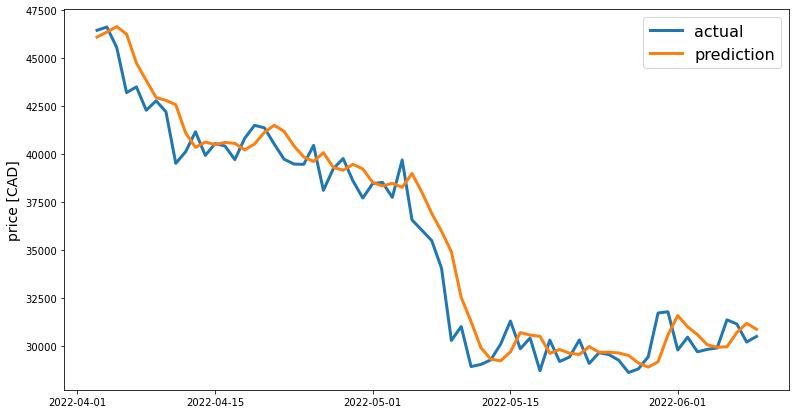

In [23]:
preds = test["Close"].values[:-window_len] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)
line_plot(targets, preds, 'actual', 'prediction', lw=3)

In [24]:
preds.index

DatetimeIndex(['2022-04-03', '2022-04-04', '2022-04-05', '2022-04-06',
               '2022-04-07', '2022-04-08', '2022-04-09', '2022-04-10',
               '2022-04-11', '2022-04-12', '2022-04-13', '2022-04-14',
               '2022-04-15', '2022-04-16', '2022-04-17', '2022-04-18',
               '2022-04-19', '2022-04-20', '2022-04-21', '2022-04-22',
               '2022-04-23', '2022-04-24', '2022-04-25', '2022-04-26',
               '2022-04-27', '2022-04-28', '2022-04-29', '2022-04-30',
               '2022-05-01', '2022-05-02', '2022-05-03', '2022-05-04',
               '2022-05-05', '2022-05-06', '2022-05-07', '2022-05-08',
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-14', '2022-05-15', '2022-05-16',
               '2022-05-17', '2022-05-18', '2022-05-19', '2022-05-20',
               '2022-05-21', '2022-05-22', '2022-05-23', '2022-05-24',
               '2022-05-25', '2022-05-26', '2022-05-27', '2022-05-28',
      

In [25]:
preds["2022-04-03"]

46102.9663496227

In [26]:
test.head(10)

,Close
Date,
2022-03-29,47465.730469
2022-03-30,47062.664062
2022-03-31,45538.675781
2022-04-01,46281.644531
2022-04-02,45868.949219
2022-04-03,46453.566406
2022-04-04,46622.675781
2022-04-05,45555.992188
2022-04-06,43206.738281
